<a href="https://www.kaggle.com/code/mahdimurshed/data-science-assignment-1?scriptVersionId=111303081" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brfss-data/brfss.csv


# Lab Activity 01

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../input/brfss-data/brfss.csv",index_col=0)
df.head()

,age,weight2,wtyrago,wtkg2,htm3,sex
0,39.0,88.636364,88.636364,88.64,180.0,1
1,64.0,75.000000,84.545455,75.00,155.0,2
2,87.0,61.818182,63.636364,61.82,NaN,2
3,51.0,100.000000,100.000000,100.00,183.0,1
4,35.0,63.636364,61.363636,63.64,170.0,2


In [4]:
df.describe()

,age,weight2,wtyrago,wtkg2,htm3,sex
count,410856.000000,398484.000000,390399.000000,398484.000000,409129.000000,414509.000000
mean,54.862180,78.992337,79.721319,78.992453,168.825190,1.624368
std,16.737702,19.546212,20.565164,19.546157,10.352653,0.484286
min,18.000000,20.000000,22.727273,20.000000,61.000000,1.000000
25%,43.000000,64.545455,64.545455,64.550000,160.000000,1.000000
50%,55.000000,77.272727,77.272727,77.270000,168.000000,2.000000
75%,67.000000,90.909091,90.909091,90.910000,175.000000,2.000000
max,99.000000,309.090909,342.272727,309.090000,236.000000,2.000000


### To clean the dataset

In [5]:
def cleanBRFSSFrame(dataset):
    dataset.drop('sex',inplace=True,axis=1)
    dataset.dropna(inplace=True)

In [6]:
cleanBRFSSFrame(df)

**Checking if any null data available after cleaning**

In [7]:
df.isnull().sum()

age        0
weight2    0
wtyrago    0
wtkg2      0
htm3       0
dtype: int64

In [8]:
df.columns

Index(['age', 'weight2', 'wtyrago', 'wtkg2', 'htm3'], dtype='object')

In [9]:
df.weight2.describe()

count    385974.000000
mean         79.061463
std          19.514283
min          20.000000
25%          64.545455
50%          77.272727
75%          90.909091
max         300.000000
Name: weight2, dtype: float64

### Numerical on age column

In [10]:
df.age.median()

55.0

In [11]:
df.age.mode()

0    60.0
dtype: float64

# Lab Activity 02

### min-max algorithm  

In [12]:
def min_max(column):
    mn=column.min()
    mx=column.max()
    column =( column - mn)/(mx-mn)
    return column

In [13]:
normalized_df=df.apply(min_max, axis='index')

In [14]:
normalized_df.head()

,age,weight2,wtyrago,wtkg2,htm3
0,0.259259,0.245130,0.206259,0.245143,0.680000
1,0.567901,0.196429,0.193457,0.196429,0.537143
3,0.407407,0.285714,0.241821,0.285714,0.697143
4,0.209877,0.155844,0.120910,0.155857,0.622857
5,0.543210,0.180195,0.149360,0.180179,0.640000


<AxesSubplot:>

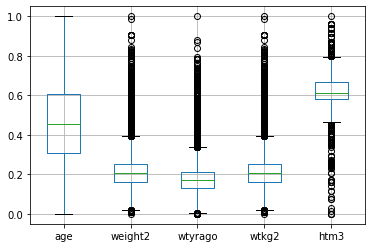

In [15]:
normalized_df.boxplot()